# Linear Regression with Numpy

This notebook implements linear regression from scratch using only Numpy.

**Usage:** to estimate unknown values based on existing data.

**Import the nessesary libraries**

In [17]:
import matplotlib.pyplot as plt # used for drawing the graph
import numpy as np # used for numerical operations

**Load data from dataset**

In [18]:
def read_dataset():
    # Read data from lr2_data.txt, assuming two columns: area and price
    data = np.loadtxt('../../lr2_data.txt', delimiter='	')
    x = data[:, 1]
    y = data[:, 2]
    return x, y

**initializing parameters**

In [19]:
def initialize_parameters():
    weight = 0.0 # affecting the line way it fits the data in the horizontal direction
    bias = 0.0 # affecting the line way it fits the data in the vertical direction
    return weight, bias

**Define calculating gradients function**

In [20]:
def compute_gradients(x, y, weight, bias): # this function calcuates the gradients based on x and y
    n = len(x)
    y_pred = weight * x + bias # predicted values based on the current weight and bias
    dw = (-2/n) * np.sum((y - y_pred) * x) # gradient with respect to the x values
    db = (-2/n) * np.sum(y - y_pred)       # gradient with respect to the y values
    return dw, db

**Define implementing gradient descent function**

In [21]:
def gradient_descent(x, y, weight, bias, learning_rate, epochs): # this function implements the gradient descent algorithm
    loss_history = [] # to store the loss at each step
    for i in range(epochs):
        dw, db = compute_gradients(x, y, weight, bias)
        weight -= learning_rate * dw
        bias -= learning_rate * db
        y_pred = weight * x + bias
        loss = np.mean((y - y_pred) ** 2) 
        loss_history.append(loss)
    return weight, bias, loss_history # returns the final weight, bias and loss history after training

**Define visualizing the change curve of the loss function**

In [22]:
def plot_loss_curve(loss_history):
    plt.plot(loss_history, color='blue')
    plt.xlabel("steps")
    plt.ylabel("loss function")
    plt.title("step - loss function curve") 
    plt.show()

**Define visualizing the data points and the fitted curve function**

In [23]:
def plot_fit(x, y, weight, bias):
    plt.scatter(x, y, color='blue', label="sample data", marker='x')
    y_pred = weight * x + bias
    plt.plot(x, y_pred, color='red', label="regression curve")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("liner regression curve")
    plt.legend() # info box about the graph
    plt.show()

**Draw the final result**

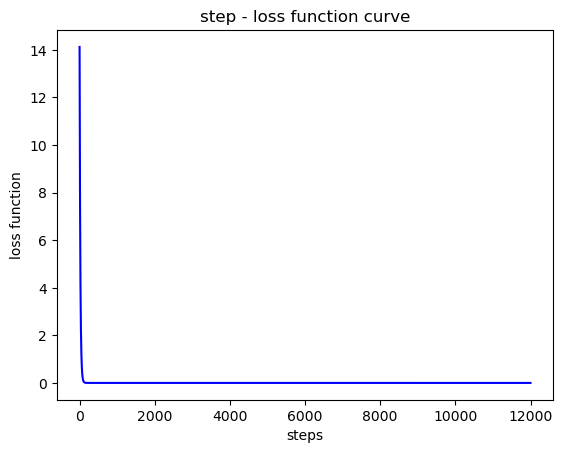

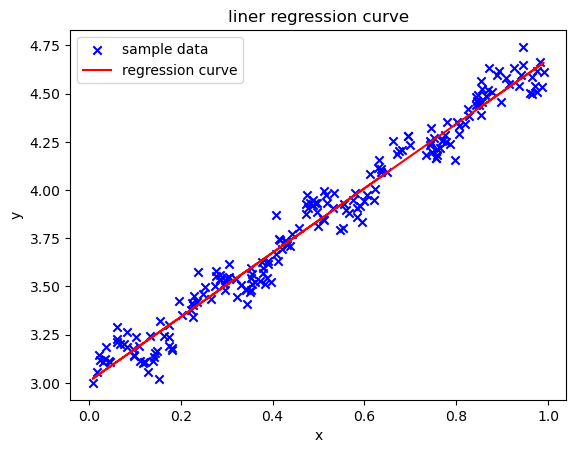

In [24]:
x, y = read_dataset()
weight, bias = initialize_parameters()
learning_rate = 0.01 # affects how fast the line pulled into the defined direction
epochs = 12000 #affects how line pulled into the defined direction
weight, bias, loss_history = gradient_descent(x, y, weight, bias, learning_rate, epochs) 
plot_loss_curve(loss_history)
plot_fit(x, y, weight, bias)